# Step 1: Import necessary libraries

In [ ]:
pip install tensorflow


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import mnist
import keras


Could not save font_manager cache Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\ksham\.matplotlib\fontlist-v390.json.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.


In [ ]:
pip install --upgrade numpy


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf


# Step 2: Load the Dataset

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#normalize the data (max of 0-255 ,so divide by 255)
x_train=x_train/255
x_test=x_test/255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

# Step 3: Define the network Architecture

In [17]:
model=Sequential() #Sequential as a feed forward network
model.add(keras.layers.Flatten(input_shape=(28,28)))  #Flatten the input(i.e. convett to 1-D array) and provide the input size to the input layer
model.add(keras.layers.Dense(256,activation='relu'))  #Define the hidden layer with 128 nodes (<than 28x28) with Relu as activation function
model.add(keras.layers.Dense(10,activation='softmax'))#Define the output layer with 10 nodes (number of classes=10) with softmax activation function

C:\Users\ksham\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Step 4: Train the Model

In [19]:
 model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])#Fit the model for the training set and also providing the validation set and number of epochs
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7518 - loss: 0.9843 - val_accuracy: 0.9046 - val_loss: 0.3467
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9054 - loss: 0.3453 - val_accuracy: 0.9206 - val_loss: 0.2837
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9208 - loss: 0.2898 - val_accuracy: 0.9304 - val_loss: 0.2544


# Step 5: Evaluate the model

In [20]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Loss=%.3f'%test_loss)
print('Accuracy=%.3f'%test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9192 - loss: 0.2924
Loss=0.254
Accuracy=0.930


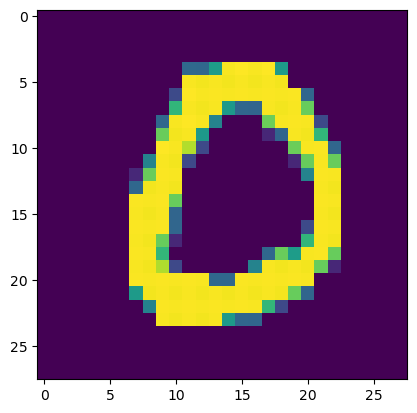

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
The didgit is:  0


In [23]:
#Randomly choose any image from the test test and evaluate the predict of the model
import random
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
pred=model.predict(x_test)
print('The didgit is: ',np.argmax(pred[n]))

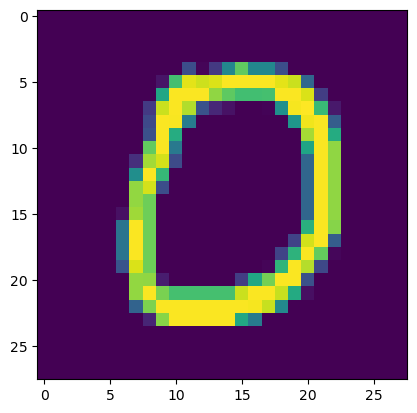

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The Digit is:  0


In [25]:
plt.imshow(x_test[10])
plt.show()
pred=model.predict(x_test)
print('The Digit is: ',np.argmax(pred[10]))

# Step 6: Plot the accuracy and loss Graphs

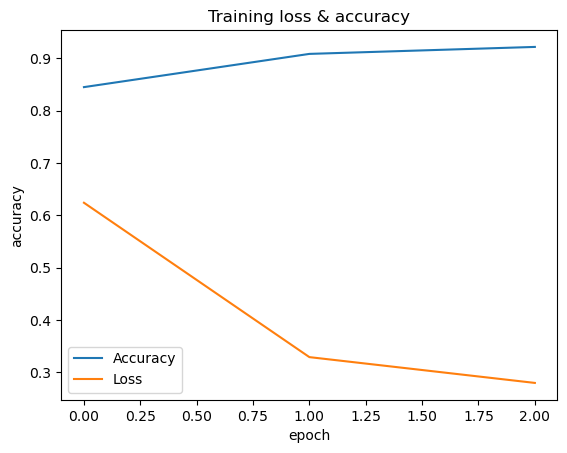

In [31]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['loss'])
plt.title('Training loss & accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Loss'])

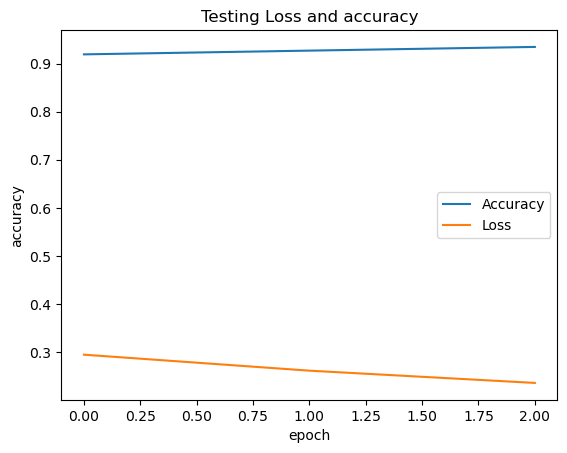

In [13]:
plt.plot(H.history['val_accuracy']) #get the accuracy for the validation set from the model's history attribute
plt.plot(H.history['val_loss']) #get the loss for the validation set from the model's history attribute
plt.title('Testing Loss and accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'])